Data Analysis

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Load dataset

In [ ]:
import pandas as pd
df=pd.read_excel('/content/marketing_campaign1.xlsx',sheet_name='marketing_campaign')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
df.shape

(2240, 29)

Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

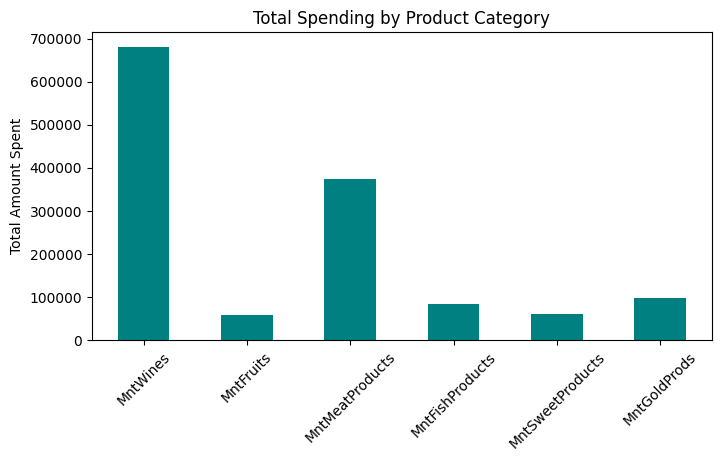

In [ ]:
#bar chart
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df[spend_cols].sum().plot(kind='bar', color='teal', figsize=(8,4))
plt.title("Total Spending by Product Category")
plt.ylabel("Total Amount Spent")
plt.xticks(rotation=45)
plt.show()

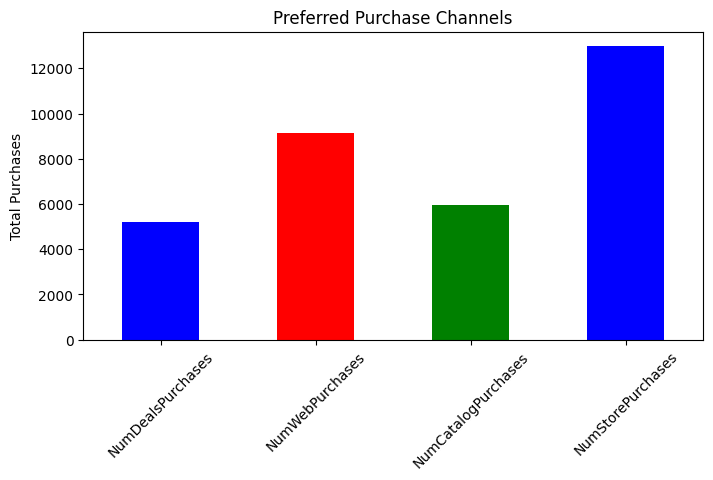

In [ ]:
#bar chart
channels = ['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df[channels].sum().plot(kind='bar', color=['blue', 'red', 'green'], figsize=(8,4))
plt.title("Preferred Purchase Channels")
plt.ylabel("Total Purchases")
plt.xticks(rotation=45)
plt.show()

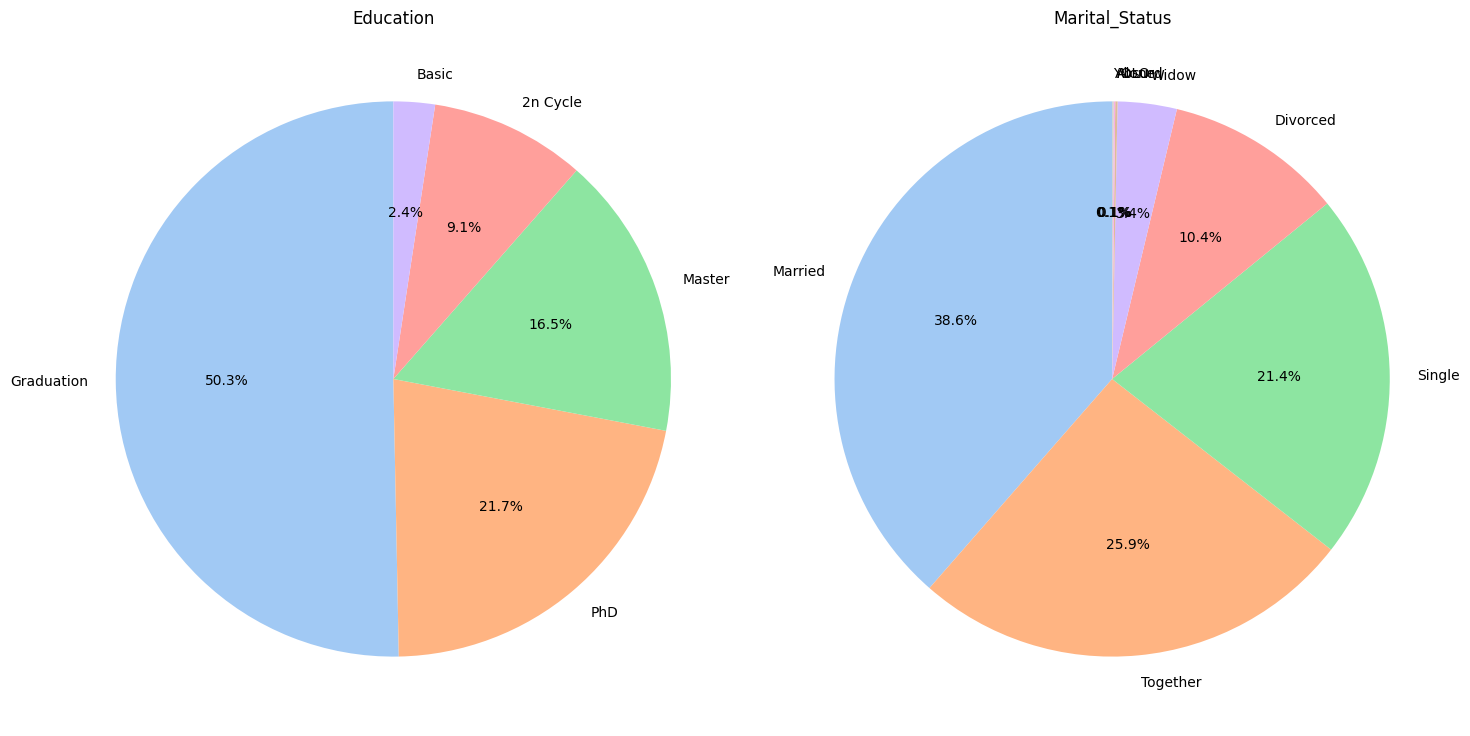

In [ ]:
# Pie charts
categorical_cols = ['Education', 'Marital_Status']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

for ax, col in zip(axes, categorical_cols):
    df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, startangle=90, colors=sns.color_palette('pastel'))
    ax.set_title(f'{col}')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

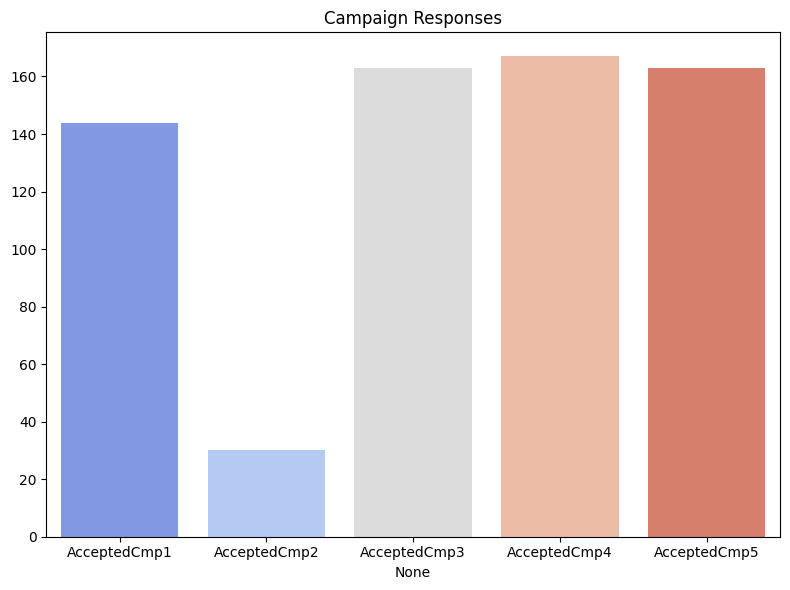

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_sums = df[campaign_cols].sum()
sns.barplot(x=campaign_sums.index, y=campaign_sums.values, palette="coolwarm") # Now sns is defined and can be used
axs.set_title("Campaign Responses")

plt.tight_layout()
plt.show()

In [ ]:
df.isnull().sum()       # checking for missing values

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
median=df['Income'].median()              # replacing the missing values

df.fillna({'Income':median},inplace=True)

In [ ]:
df.duplicated().any()           # checking for duplicates

np.False_

In [ ]:
df['Marital_Status'].replace(['Alone','Absurd','YOLO'],'Single',inplace=True)   # replacing unusal values

In [ ]:
num_col=df.select_dtypes(include=['int','float'])  # numerical columns

cat_col=df.select_dtypes(include='O') # categorical column

In [ ]:
corr=num_col.corr()      # correlation

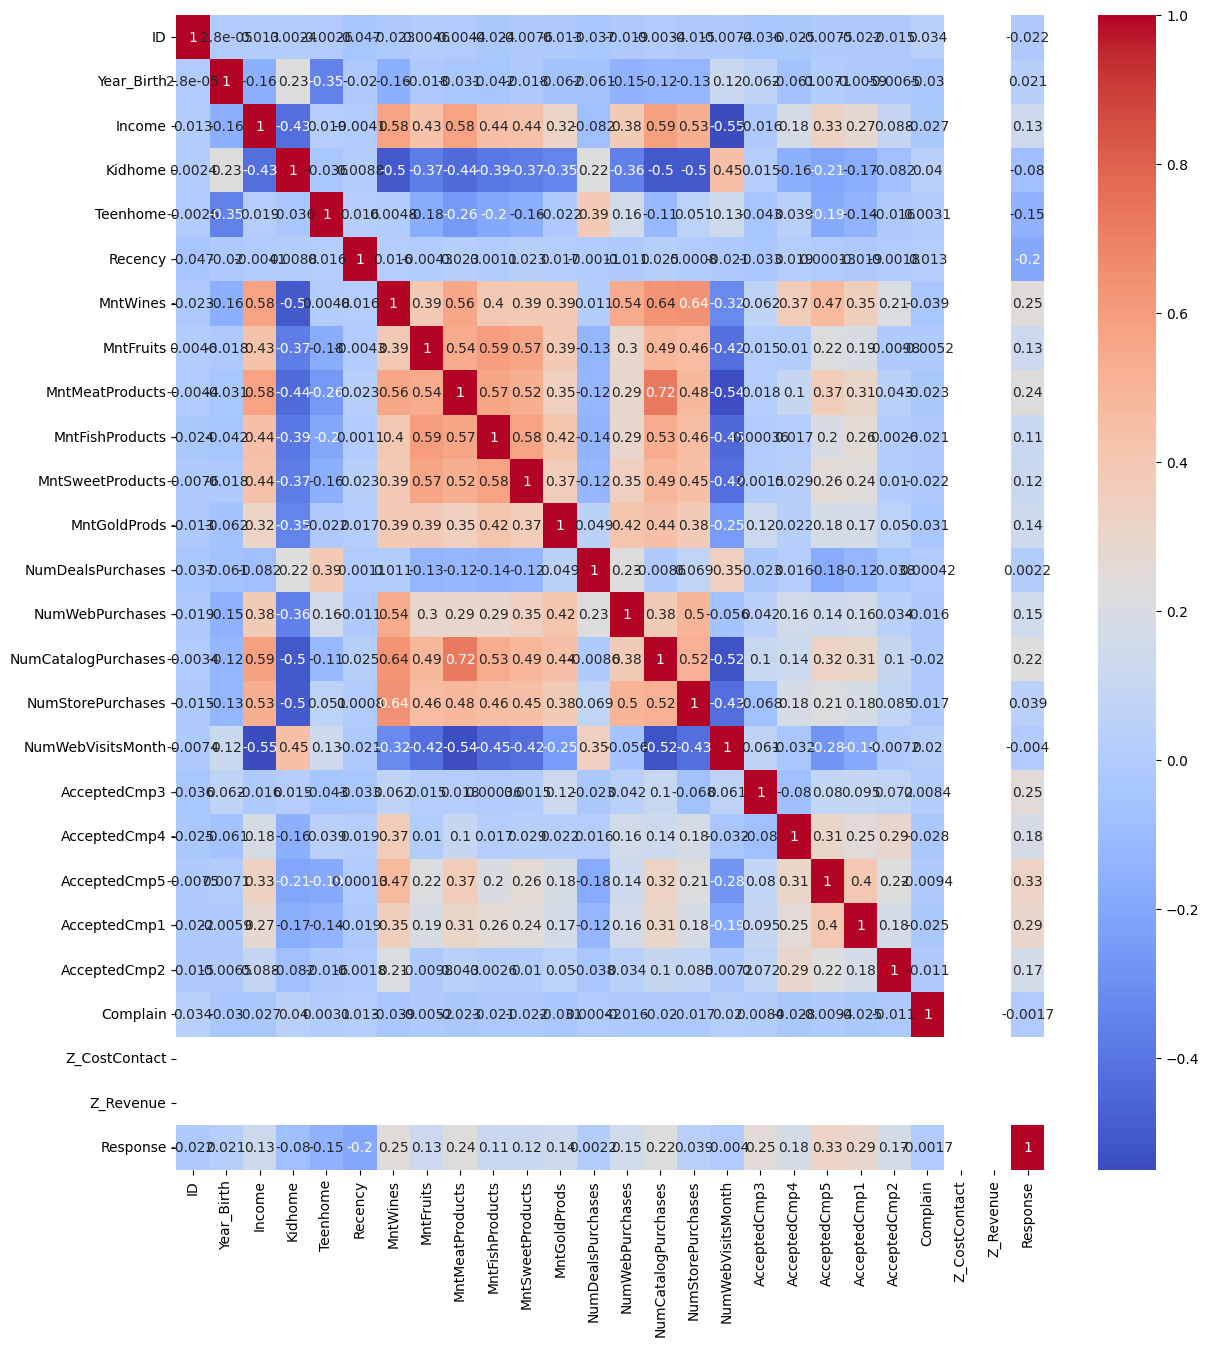

In [ ]:
# heatmap for correlation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,15))

sns.heatmap(corr,annot=True,cmap='coolwarm')

plt.show()

In [ ]:
# dropping unnecessary columns
num_col.drop(columns=['ID','Z_CostContact','Z_Revenue'],inplace=True)

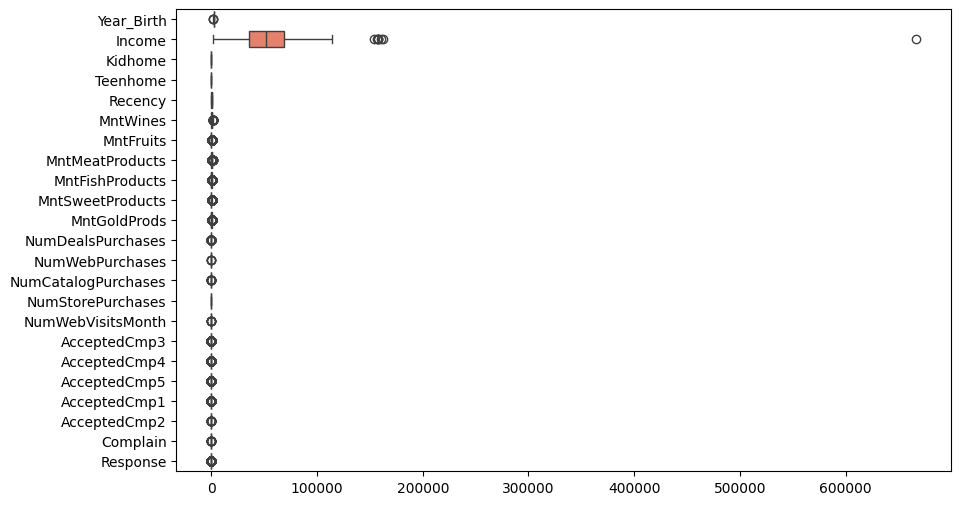

In [ ]:
# checking for outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.boxplot(num_col,orient='h')

plt.show()

In [ ]:
# capping method to treat outliers
def capping(num_col,col):
  Q1=num_col[col].quantile(0.25)
  Q3=num_col[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  num_col[col]=num_col[col].apply(lambda x:lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)

for col in num_col:
  capping(num_col,col)

<Axes: >

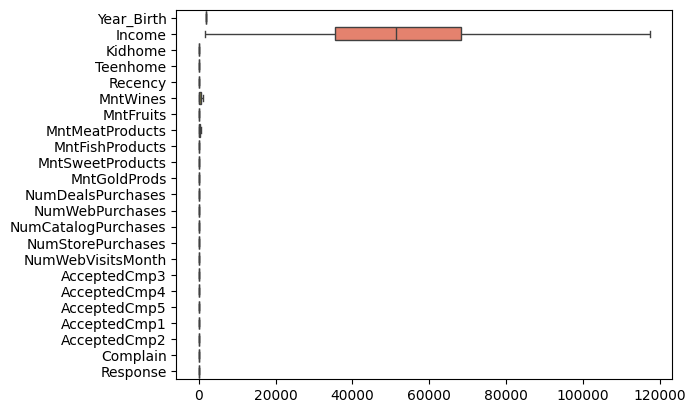

In [ ]:
sns.boxplot(num_col,orient='h')

In [ ]:
# one-hot encoder
cat_col=pd.get_dummies(data=cat_col,dtype='int')

In [ ]:
# dropping the columns which is not related to purchasing behaviour
num_col.drop(columns=['Year_Birth','Income','Kidhome','Teenhome','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Recency','Complain','Response'],inplace=True)

In [ ]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

sta_sca=MinMaxScaler()
df_new=pd.DataFrame(sta_sca.fit_transform(num_col),columns=num_col.columns)

In [ ]:
df_new.shape

(2240, 11)

In [ ]:
df_new

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0.518367,1.000000,0.982014,1.000000,1.000000,0.695652,0.500000,0.666667,1.0,0.307692,0.538462
1,0.008980,0.012346,0.010791,0.016598,0.012346,0.047431,0.333333,0.083333,0.1,0.153846,0.384615
2,0.347755,0.604938,0.228417,0.921162,0.259259,0.332016,0.166667,0.666667,0.2,0.769231,0.307692
3,0.008980,0.049383,0.035971,0.082988,0.037037,0.039526,0.333333,0.166667,0.0,0.307692,0.461538
4,0.141224,0.530864,0.212230,0.381743,0.333333,0.118577,0.833333,0.416667,0.3,0.461538,0.384615
...,...,...,...,...,...,...,...,...,...,...,...
2235,0.578776,0.530864,0.327338,0.348548,1.000000,1.000000,0.333333,0.750000,0.3,0.307692,0.384615
2236,0.331429,0.000000,0.053957,0.000000,0.000000,0.063241,1.000000,0.666667,0.2,0.384615,0.538462
2237,0.741224,0.592593,0.390288,0.265560,0.148148,0.189723,0.166667,0.166667,0.3,1.000000,0.461538
2238,0.349388,0.370370,0.384892,0.663900,0.370370,0.482213,0.333333,0.500000,0.5,0.769231,0.230769


Model Building

Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

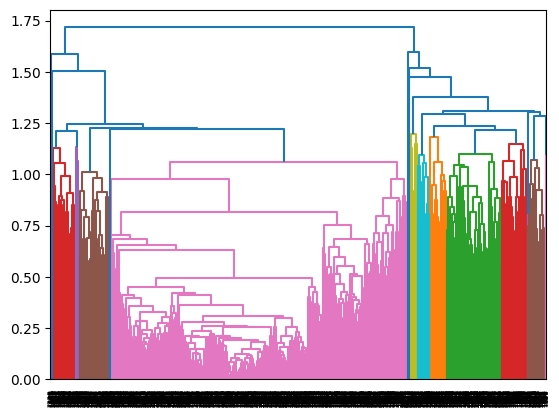

In [ ]:
dendrogram=sch.dendrogram(sch.linkage(df_new,method='average'))

In [ ]:
agg1=AgglomerativeClustering(n_clusters=2,linkage='average')
cluster1=agg1.fit(df_new)

In [ ]:
silhouette_score(df_new,cluster1.labels_)

np.float64(0.4346313382836833)

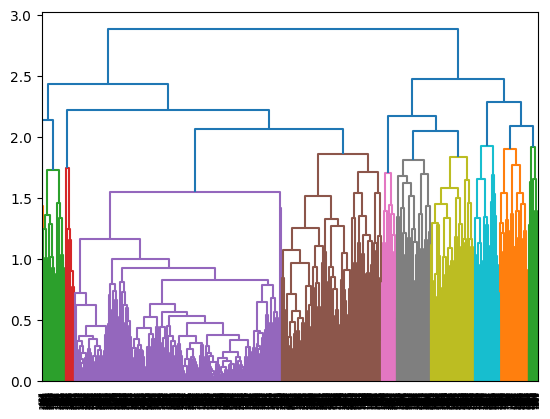

In [ ]:
dendrogram=sch.dendrogram(sch.linkage(df_new,method='complete'))

In [ ]:
agg2=AgglomerativeClustering(n_clusters=2,linkage='complete')
cluster2=agg2.fit_predict(df_new)

In [ ]:
silhouette_score(df_new,cluster2)

np.float64(0.42041828721614516)

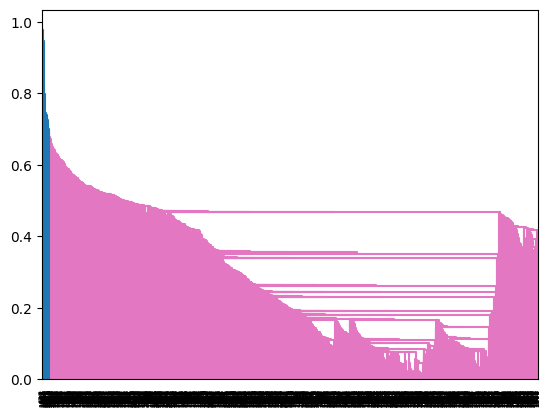

In [ ]:
dendrogram=sch.dendrogram(sch.linkage(df_new,method='single'))

In [ ]:
agg3=AgglomerativeClustering(n_clusters=2,linkage='single')
cluster3=agg3.fit(df_new)

In [ ]:
silhouette_score(df_new,cluster3.labels_)

np.float64(0.33760017641933504)

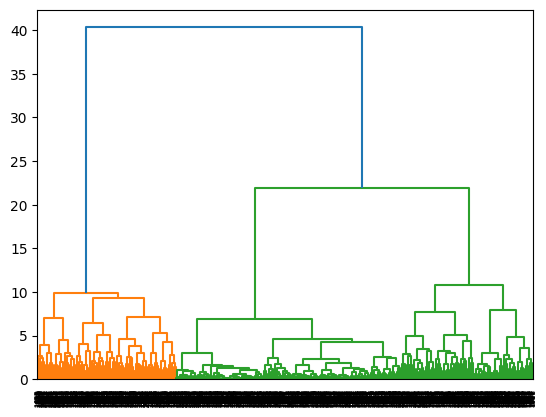

In [ ]:
dendrogram=sch.dendrogram(sch.linkage(df_new,method='ward'))

In [ ]:
agg4=AgglomerativeClustering(n_clusters=2,linkage='ward')
cluster4=agg4.fit(df_new)

In [ ]:
silhouette_score(df_new,cluster4.labels_)

np.float64(0.4289067803695227)

KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Elbow method to choose number of clusters
inertia=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df_new)
  inertia.append(kmeans.inertia_)

print(inertia)

[2018.503198278713, 1099.89007573024, 911.8292451303146, 840.6442815671151, 791.0836429510899, 748.3044640988539, 726.7934834725401, 684.1657286025902, 660.9673739222292, 642.2287486873956]


Text(0, 0.5, 'Inertia')

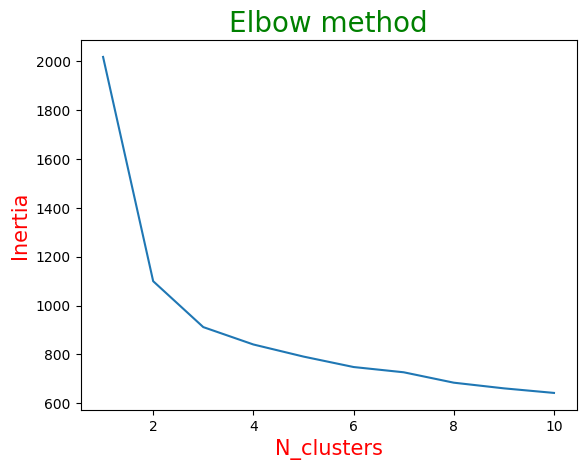

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),inertia)
plt.title('Elbow method',size=20,color='green')
plt.xlabel('N_clusters',size=15,color='red')
plt.ylabel('Inertia',size=15,color='red')

In [ ]:
kmeans=KMeans(n_clusters=2)

In [ ]:
kmeans.fit(df_new)

KMeans(n_clusters=2)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(df_new,kmeans.labels_)

np.float64(0.44867238623701405)

PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2)

In [ ]:
pca.fit(df_new)

PCA(n_components=2)

In [ ]:
features=pca.transform(df_new)

KMeans with pca

In [ ]:
kmeans1=KMeans(n_clusters=2,random_state=42)

In [ ]:
kmeans1.fit(features)

KMeans(n_clusters=2, random_state=42)

In [ ]:
df2=pd.DataFrame(features)
df2=df2.rename(columns={0:'pca1',1:'pca2'})
df2.head()

,pca1,pca2
0,1.560018,-0.011592
1,-0.709947,-0.196373
2,0.545677,-0.093804
3,-0.641799,-0.147314
4,0.076474,0.160526


In [ ]:
df2['clusters']=kmeans1.labels_

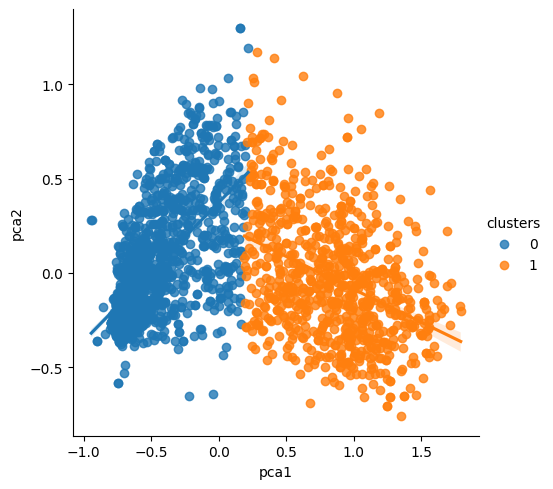

In [ ]:
sns.lmplot(data=df2,x='pca1',y='pca2',hue='clusters')

In [ ]:
silhouette_score(features,kmeans1.labels_)

np.float64(0.5994921995858667)

In [ ]:
df2.drop(columns='clusters',inplace=True)

DBSCAN with PCA

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# finding the best eps and min_samples

min_samples = range(2,10)

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
for min_samples in min_samples:
  neigh = NearestNeighbors(n_neighbors=min_samples)
  neigh.fit(df2)
  distances, _ = neigh.kneighbors(df2)
print(f'best_min_samples:{min_samples}')

best_min_samples:9


In [ ]:
import numpy as np

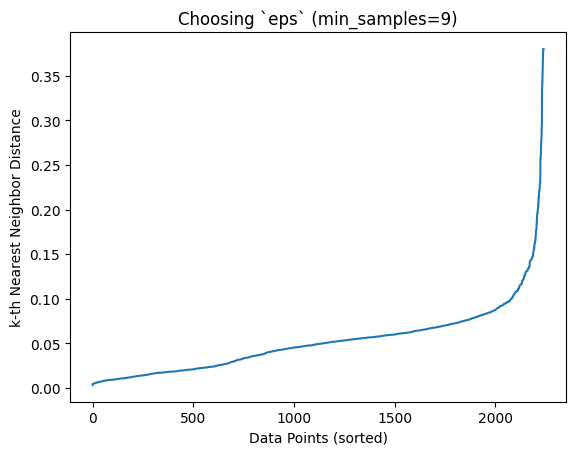

In [ ]:
distances = np.sort(distances[:, min_samples-1])  # Get k-th nearest distances

plt.plot(distances)
plt.ylabel("k-th Nearest Neighbor Distance")
plt.xlabel("Data Points (sorted)")
plt.title(f"Choosing `eps` (min_samples={min_samples})")
plt.show()

In [ ]:
epsilon={}
for eps in np.arange(0.05,0.10,0.01):
  dbscan = DBSCAN(eps=eps, min_samples=min_samples)
  labels = dbscan.fit_predict(df2)
  score=silhouette_score(df2,labels)
  epsilon[eps]=score
best_eps=max(epsilon,key=epsilon.get)
print(f'best_eps:{best_eps}')

best_eps:0.09000000000000001


In [ ]:
dbscan = DBSCAN(eps=eps, min_samples=4)
labels = dbscan.fit_predict(df2)

<Axes: xlabel='pca1', ylabel='pca2'>

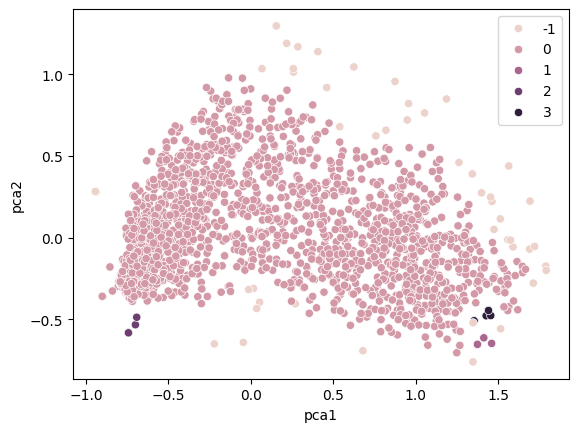

In [ ]:
sns.scatterplot(data=df2,x='pca1',y='pca2',hue=labels)

In [ ]:
silhouette_score(df2,labels)

np.float64(-0.2506286488227875)

Agglomerative with pca

In [ ]:
agg1_pca=AgglomerativeClustering(n_clusters=2,linkage='average')
cluster1_pca=agg1_pca.fit(df2)

In [ ]:
silhouette_score(df2,cluster1_pca.labels_)

np.float64(0.5951345140440744)

In [ ]:
agg2_pca=AgglomerativeClustering(n_clusters=2,linkage='complete')
cluster2_pca=agg2_pca.fit(df2)

In [ ]:
silhouette_score(df2,cluster2_pca.labels_)

np.float64(0.5803783382888482)

In [ ]:
agg3_pca=AgglomerativeClustering(n_clusters=2,linkage='single')
cluster3_pca=agg3_pca.fit(df2)

In [ ]:
silhouette_score(df2,cluster3_pca.labels_)

np.float64(-0.0051765321221393336)

In [ ]:
agg4_pca=AgglomerativeClustering(n_clusters=2,linkage='ward')
cluster4_pca=agg4_pca.fit(df2)

In [ ]:
silhouette_score(df2,cluster4_pca.labels_)

np.float64(0.5949383279713105)

Model Deployment

In [ ]:
import pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(sta_sca, file)

In [ ]:
with open('pca.pkl', 'wb') as f:
    pickle.dump(pca,f)

In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.0 MB/s eta 0:00:00


In [ ]:
# import pickle file
import pickle
file='kmeans_model.pkl'
with open(file, 'wb') as f:
    pickle.dump(kmeans1, f)

In [ ]:
# insatll localtunnel
!npm install -g localtunnel -U

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇
added 22 packages in 7s
⠇
⠇3 packages are looking for funding
⠇  run `npm fund` for details
⠇

In [ ]:
#model_dep.py
%%writefile Model_dep.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
import pickle

with open('kmeans_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open('pca.pkl', 'rb') as f:
    pca = pickle.load(f)

def user_input_parameters():
  MntWines=st.sidebar.number_input('Amount spent on wines',min_value=0)
  MntFruits=st.sidebar.number_input('Amount spent on fruits',min_value=0)
  MntMeatProducts=st.sidebar.number_input('Amount spent on meat products',min_value=0)
  MntFishProducts=st.sidebar.number_input('Amount spent on fish products',min_value=0)
  MntSweetProducts=st.sidebar.number_input('Amount spent on sweet products',min_value=0)
  MntGoldProds=st.sidebar.number_input('Amount spent on gold products',min_value=0)
  NumDealsPurchases=st.sidebar.number_input('Number of deal purchases',min_value=0)
  NumWebPurchases=st.sidebar.number_input('Number of Web purchases',min_value=0)
  NumStorePurchases=st.sidebar.number_input('Number of Store purchases',min_value=0)
  NumCatalogPurchases=st.sidebar.number_input('Number of Catalog purchases',min_value=0)
  NumWebVisitsMonth=st.sidebar.number_input('Number of visits to company’s website in the last month',min_value=0)


  data={'MntWines':MntWines,'MntFruits':MntFruits,
        'MntMeatProducts':MntMeatProducts,'MntFishProducts':MntFishProducts,'MntSweetProducts':MntSweetProducts,
        'MntGoldProds':MntGoldProds,'NumDealsPurchases':NumDealsPurchases,'NumWebPurchases':NumWebPurchases,
        'NumCatalogPurchases':NumCatalogPurchases,'NumStorePurchases':NumStorePurchases,
        'NumWebVisitsMonth':NumWebVisitsMonth }
  features=pd.DataFrame(data,index=[0])
  return features

df1=user_input_parameters()
scaled_all = scaler.transform(df1)
pca_all = pca.transform(scaled_all)
cluster_labels = loaded_model.predict(pca_all)

df_clustered = df1.copy()
df_clustered['Cluster'] = cluster_labels
cluster_averages = df_clustered.groupby('Cluster').mean()

st.title('Customer Segmentation based on purchasing behavoiur')
if st.button('Predict'):
    # Predict cluster for user's input
    predicted_cluster = int(cluster_labels[0])

    # Display the result
    st.write(f"The predicted cluster for this customer is: {predicted_cluster}")
    if predicted_cluster==0:
      st.success('Low spender')
    else:
      st.success('High Spender')

    # Generate dummy data for visualization
    dummy_data = np.random.randn(100, df1.shape[1]) * 10 + df1.mean().values
    dummy_scaled = scaler.transform(dummy_data)
    dummy_pca = pca.transform(dummy_scaled)
    dummy_clusters = loaded_model.predict(dummy_pca)
    centers = loaded_model.cluster_centers_

    #Scatter plot of customer clusters
    st.subheader("Customer Cluster Visualization")
    fig1 = plt.figure(figsize=(7, 5))
    plt.scatter(dummy_pca[:, 0], dummy_pca[:, 1], c=dummy_clusters, cmap='viridis', alpha=0.5)
    plt.scatter(pca_all[0, 0], pca_all[0, 1], color='black', marker='*', s=200, label='Your Customer')
    plt.scatter(centers[:, 0], centers[:, 1], color='red', marker='X', s=150, label='Cluster Centers')
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.title("Customer Cluster Visualization")
    plt.legend()
    st.pyplot(fig1)

# Visualization
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
spending_df = df1[spending_cols].T  # Transpose for vertical bar chart
spending_df.columns = ['Amount']
spending_df = spending_df.reset_index().rename(columns={'index': 'Product'})

st.bar_chart(spending_df.set_index('Product'))

Writing Model_dep.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.73.166.19


In [ ]:
!streamlit run Model_dep.py & npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙

your url is: https://sad-waves-exist.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.73.166.19:8501

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils